In [1]:
# Importing the Libraries
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [6]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [8]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 198s 126ms/step - loss: 1.8987 - accuracy: 0.3054 - val_loss: 1.4982 - val_accuracy: 0.4701
Epoch 2/5
1563/1563 [==============================] - 194s 124ms/step - loss: 1.4348 - accuracy: 0.4850 - val_loss: 1.3279 - val_accuracy: 0.5174
Epoch 3/5
1563/1563 [==============================] - 196s 126ms/step - loss: 1.3229 - accuracy: 0.5262 - val_loss: 1.2525 - val_accuracy: 0.5577
Epoch 4/5
1563/1563 [==============================] - 195s 125ms/step - loss: 1.2415 - accuracy: 0.5547 - val_loss: 1.1969 - val_accuracy: 0.5733
Epoch 5/5
1563/1563 [==============================] - 196s 125ms/step - loss: 1.2006 - accuracy: 0.5703 - val_loss: 1.1736 - val_accuracy: 0.5799


In [9]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 57.99%


In [10]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
model1.add(Dropout(0.2))
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(Dropout(0.2))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(Dropout(0.2))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dropout(0.2))
model1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model1.add(Dropout(0.2))
model1.add(Dense(num_classes, activation='softmax'))

In [11]:
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)       

In [13]:
# Training the model
history=model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Epoch 1/5
391/391 [==============================] - 377s 962ms/step - loss: 2.1747 - accuracy: 0.1839 - val_loss: 1.9482 - val_accuracy: 0.2954
Epoch 2/5
391/391 [==============================] - 373s 955ms/step - loss: 1.7722 - accuracy: 0.3504 - val_loss: 1.6254 - val_accuracy: 0.4306
Epoch 3/5
391/391 [==============================] - 370s 948ms/step - loss: 1.5879 - accuracy: 0.4208 - val_loss: 1.5079 - val_accuracy: 0.4600
Epoch 4/5
391/391 [==============================] - 367s 938ms/step - loss: 1.4815 - accuracy: 0.4603 - val_loss: 1.4263 - val_accuracy: 0.4990
Epoch 5/5
391/391 [==============================] - 368s 942ms/step - loss: 1.4129 - accuracy: 0.4873 - val_loss: 1.3600 - val_accuracy: 0.5192


In [14]:
# Model Evalutaion
scores1 = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy afte: %.2f%%" % (scores1[1]*100))

Accuracy afte: 51.92%


In [15]:
model1.save('./model' + '.h5')

In [16]:
from keras import models
saved_model = models.load_model('model.h5')

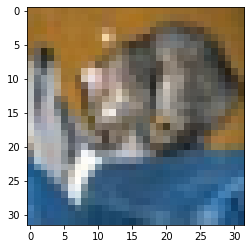

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Actual Value for :1 Image 3
Predicted Value for 1 Image 3



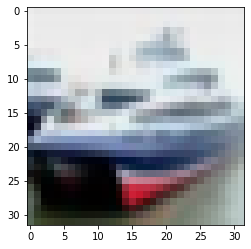

Actual Value for :2 Image 8
Predicted Value for 2 Image 1



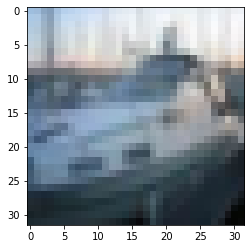

Actual Value for :3 Image 8
Predicted Value for 3 Image 8



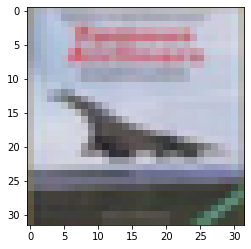

Actual Value for :4 Image 0
Predicted Value for 4 Image 8



In [18]:
# Visualizing the sample images and Predicted values
import matplotlib.pyplot as plt
for i in range(0,4):
    plt.imshow(X_test[i,:,:])  
    plt.show()
    predicted_value = saved_model.predict(X_test[[i],:])
    predict_classes = saved_model.predict_classes(X_test[[i],:])
    actual_value = y_test[[i],:]
    print("Actual Value for :" + str(i+1) + ' Image ' + str(numpy.argmax(actual_value)))
    print("Predicted Value for " + str(i+1) + ' Image ' + str(predict_classes[0])+'\n')

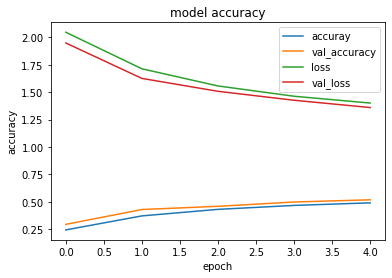

In [19]:
# Plot the accuracy & loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper right')
plt.show()
